In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [2]:
breast_img = glob.glob('./Breast-Canser/IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
./Breast-Canser/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


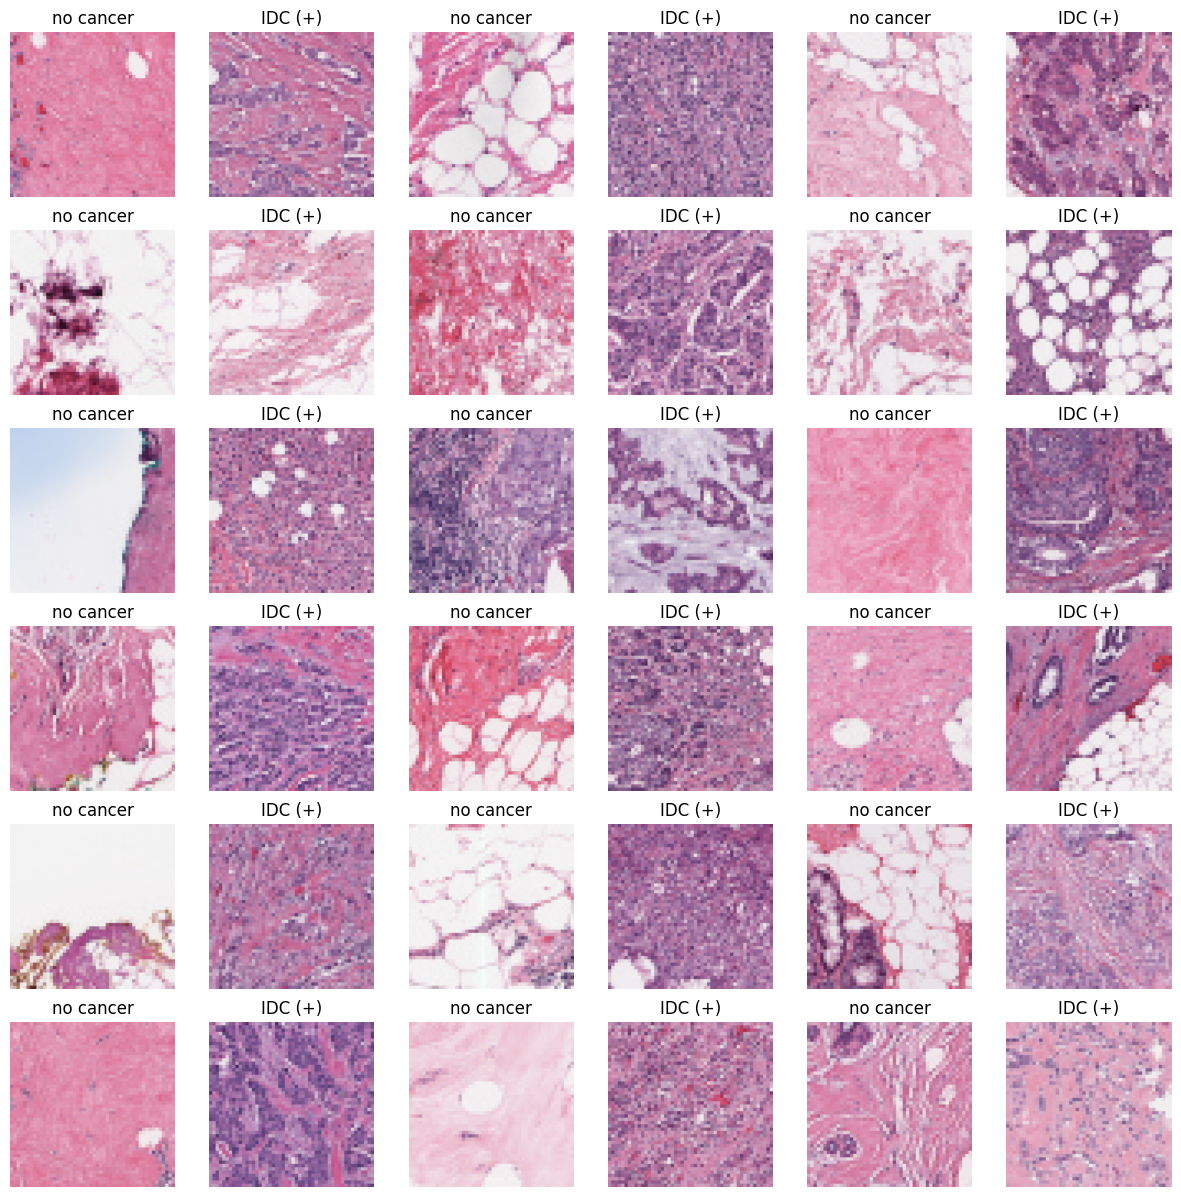

In [3]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [4]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))

78786
78786


In [5]:
non_img_arr = []
can_img_arr = []

for img in NewN_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [6]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr[:20757], can_img_arr[:20757]))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [7]:
X.shape

(41514, 50, 50, 3)

In [8]:
y.shape

(41514,)

In [9]:
num_samples, height, width, channels = X.shape


In [10]:
reshaped_array = X.reshape(num_samples, height * width * channels)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reshaped_array, y,random_state=10, test_size=0.2)



In [12]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Assuming X_train and Y_train are already defined

# Define the hyperparameter grid to search
param_distributions = {
    'C': uniform(0.1, 1000),  # Continuous distribution for the regularization parameter
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'solver': ['liblinear', 'saga']  # Solvers compatible with L1 and L2 penalties
}

# Create an instance of logistic regression
logistic_regression = LogisticRegression(random_state=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(logistic_regression, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=0)

# Fit the model to the data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_

# Initialize a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_hyperparameters, random_state=0)

# Fit the best model to the entire training data
best_logistic_regression.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(Y_test, y_pred)\
# Calculate precision
precision = precision_score(Y_test, y_pred_log)

# Calculate recall (sensitivity)
recall = recall_score(Y_test, y_pred_log)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_log)

print(f"The best hyperparameters: {best_hyperparameters}")
print(f"Accuracy of the Logistic Regression Model: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")


In [28]:
from sklearn.linear_model import LogisticRegression
  

In [29]:
log = LogisticRegression()
log.fit(X_train , Y_train)


C:\Users\RaJon DaS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
Predict = log.predict(X_test)


# Logistic Regression Confusion Matrix

In [51]:
from sklearn.metrics  import confusion_matrix

In [53]:
cm = confusion_matrix(Y_test, Predict)
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)

[[10132   459]
 [  987   877]]


In [67]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision = (tp)/(tp+fp)*100
Recall=(tp)/(tp+fn)*100
F1_score = 2*((Precision*Recall)/(Precision+Recall))*100

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 69.50622240064232
Precision : 67.6328958549712
Recall : 95.08827824240011
F1_score : 7904.436106819687


# Knn Model Implement

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [35]:
knn_predict = knn.predict(X_test)

# KNN Confusion Matrix

In [55]:
cm = confusion_matrix(Y_test, knn_predict)
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)

[[9986  605]
 [ 930  934]]


In [66]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision = (tp)/(tp+fp)*100
Recall=(tp)/(tp+fn)*100
F1_score = 2*((Precision*Recall)/(Precision+Recall))*100

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 69.50622240064232
Precision : 67.6328958549712
Recall : 95.08827824240011
F1_score : 7904.436106819687


# Train the model using Decision Tree

In [39]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy' ,random_state = 0 )
tree.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
DT_predict = knn.predict(X_test)

# Decision Tree Confusion Matrix

In [57]:
cm = confusion_matrix(Y_test, DT_predict)
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)

[[9986  605]
 [ 930  934]]


In [58]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
Precision = (tp)/(tp+fp)
Recall=(tp)/(tp+fn)
F1_score = 2*((Precision*Recall)/(Precision+Recall))

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 0.876756322761943
Precision : 0.9428760268152204
Recall : 0.9148039574935874
F1_score : 0.9286278885944111


#  Train the model using RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train , Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [45]:
RF_predict = forest.predict(X_test)


# Random Forest Classifier Confusion Matrix

In [48]:
from sklearn.metrics  import confusion_matrix

In [49]:
cm = confusion_matrix(Y_test, RF_predict)
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)

[[10417   174]
 [  802  1062]]


In [65]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision = (tp)/(tp+fp)*100
Recall=(tp)/(tp+fn)*100
F1_score = 2*((Precision*Recall)/(Precision+Recall))*100

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 69.50622240064232
Precision : 67.6328958549712
Recall : 95.08827824240011
F1_score : 7904.436106819687


# Naive Bayes Model Implementation

In [59]:
from sklearn.naive_bayes import  GaussianNB
GNB_Model = GaussianNB()
GNB_Model.fit(X_train,Y_train)


GaussianNB()

In [60]:
GNB_predicted = GNB_Model.predict(X_test)

# Naive Bayes Confusion Matrix

In [61]:
cm = confusion_matrix(Y_test, GNB_predicted)
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)

[[7163 3428]
 [ 370 1494]]


In [64]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision = (tp)/(tp+fp)*100
Recall=(tp)/(tp+fn)*100
F1_score = 2*((Precision*Recall)/(Precision+Recall))*100

print("Accuracy :",Accuracy)
print("Precision :",Precision)
print("Recall :",Recall)
print("F1_score :",F1_score)

Accuracy : 69.50622240064232
Precision : 67.6328958549712
Recall : 95.08827824240011
F1_score : 7904.436106819687


# ANN Model Implement

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [70]:
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(9,input_dim =29, activation = 'relu'))
# adding the second hidden layer
classifier.add(Dense(9,activation = 'relu'))
# adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [72]:
!pip install pydot

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(classifier,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [74]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 270       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


In [75]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [76]:
hist = classifier.fit(X_train , Y_train,batch_size=35,epochs=40)

Epoch 1/40


ValueError: in user code:

    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\RaJon DaS\anaconda3\envs\testenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 29), found shape=(None, 7500)
